<a href="https://colab.research.google.com/github/hammaad2002/TIMIT-Dataset-EDA/blob/main/EDA_Timit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install datasets==1.18.3

In [ ]:
#importing necessary modules/packages
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random

In [ ]:
#setting the style of background for audio signal
plt.style.use('dark_background')

In [ ]:
#loading the dataset from 'datasets' library
%%capture
timit = load_dataset("timit_asr")

In [ ]:
#checking the directory structure
timit

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'text', 'phonetic_detail', 'word_detail', 'dialect_region', 'sentence_type', 'speaker_id', 'id'],
        num_rows: 4620
    })
    test: Dataset({
        features: ['file', 'audio', 'text', 'phonetic_detail', 'word_detail', 'dialect_region', 'sentence_type', 'speaker_id', 'id'],
        num_rows: 1680
    })
})

In [ ]:
#function for randomly plotting any signal from the dataset
def random_plot(timit,subset):
  rand_Number = random.randint(0, timit[subset].num_rows)
  plt.rcParams["figure.figsize"] = (30, 6)
  wav = timit[subset][rand_Number]['audio']['array']
  plt.plot(wav,color='white')
  list1 = timit[subset][rand_Number]['word_detail']['start']
  list2 = timit[subset][rand_Number]['word_detail']['stop']
  list3 = timit[subset][rand_Number]['word_detail']['utterance']
  temp = 0
  for i,y in zip(list1, list2):
    plt.annotate("|", xy = (i, max(wav)+0.001))
    if len(list(list3[temp].split()[0])) < 3:
      plt.annotate(list3[temp].upper(), xy = ((i+y)/2, max(wav)+0.001))
    else:
      plt.annotate(list3[temp].upper(), xy = ((i+y)/2-100*(len(list(list3[temp].split()[0]))), max(wav)+0.001))
    plt.annotate("|", xy=(y, max(wav)+0.001))
    temp +=1

#Plot of random audio signal in TIMIT dataset with word boundaries

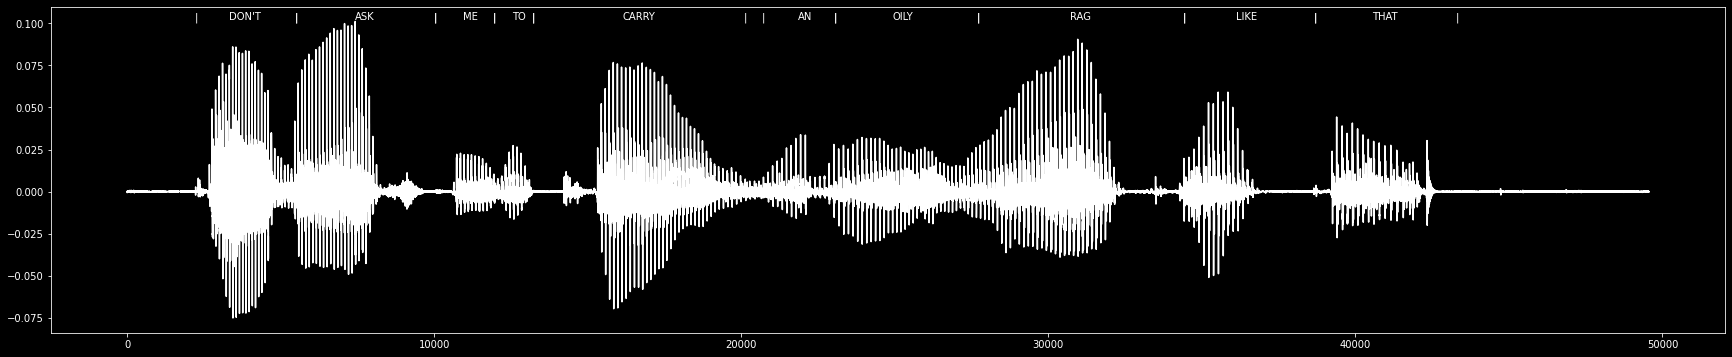

In [ ]:
subset = 'test'
random_plot(timit, subset)
plt.grid(False)
plt.show()

# **TIMIT DATASET OBSERVATIONS OF TRAINING SUBSET**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


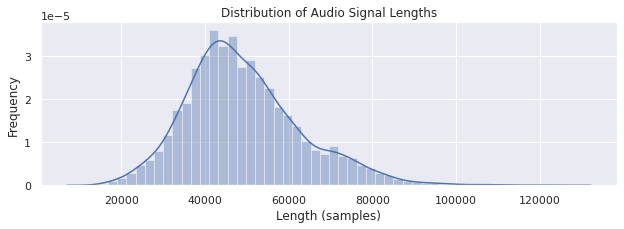

In [ ]:
#changing plotting style
sns.set() 

#Adjusting figure size
plt.rcParams["figure.figsize"] = (10.33, 3)

# Extract audio data from the training set
audio_data = [timit['train'][i]['audio']['array'] for i in range(timit['train'].num_rows)]

# Plot the distribution of audio signal lengths
lengths = [len(audio) for audio in audio_data]
sns.distplot(lengths)
plt.title("Distribution of Audio Signal Lengths")
plt.xlabel("Length (samples)")
plt.ylabel("Frequency")
plt.show()

# Observation from "Distribution of Audio Signal Lengths"
The above plot shows that the "TIMIT" dataset has mostly 45773 samples per audio clip while the occurrence of fewer than 20000 samples and greater than 80000 samples per audio clip in this dataset is quite relatively low.


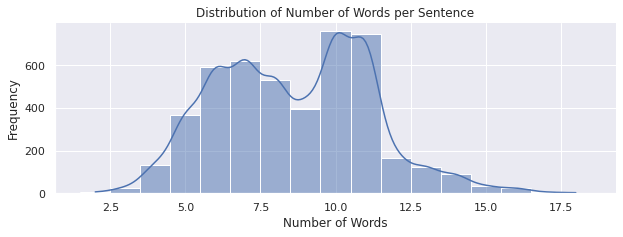

In [ ]:
# Plot the distribution of the number of words per sentence
num_words = [len(timit['train'][i]['word_detail']['utterance']) for i in range(timit['train'].num_rows)]
sns.displot(num_words, discrete=True, height=3, aspect=2.94, kde=True)
plt.title("Distribution of Number of Words per Sentence")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Observation from "Distribution of Number of Words per Sentence"
The above plot shows that:

1.   This dataset has mostly 10 words per sentence
2.   While the occurrence of fewer than 5 words and greater than 15 or more words per sentence in this dataset is quite relatively low.


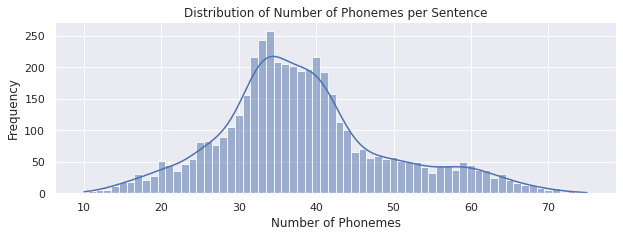

In [ ]:
# Plot the distribution of the number of phonemes per sentence
num_phonemes = [len(timit['train'][i]['phonetic_detail']['utterance']) for i in range(timit['train'].num_rows)]
sns.displot(num_phonemes, bins= 80, discrete=True, height=3, aspect=2.94, kde=True)
plt.title("Distribution of Number of Phonemes per Sentence")
plt.xlabel("Number of Phonemes")
plt.ylabel("Frequency")
plt.show()

#Observations from "Distribution of Number of Phonemes per Sentence"
The above plot shows that:

1.   This dataset has mostly 37 or 40 phonemes per sentence
2.   While the occurrence of fewer than 20 phonemes and greater than 60 phonemes per sentence in this dataset is quite relatively low.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


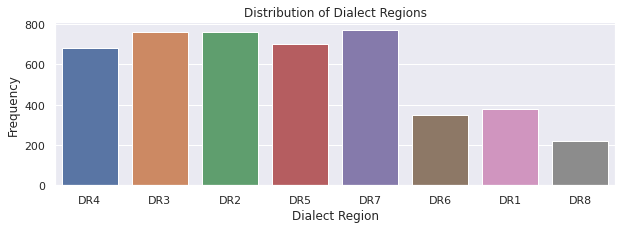

In [ ]:
#Adjusting figure size
plt.rcParams["figure.figsize"] = (10.05, 3)

# Plot the distribution of dialect regions
dialect_regions = [timit['train'][i]['dialect_region'] for i in range(timit['train'].num_rows)]
sns.countplot(dialect_regions)
plt.title("Distribution of Dialect Regions")
plt.xlabel("Dialect Region")
plt.ylabel("Frequency")
plt.show()

#Observations from "Distribution of Dialect Regions"
The above plot shows that:

1.   This dataset has mostly 'DR7' dialect region recordings.
2.   While the 'DR6' and 'DR8' dialect region recordings in this dataset are quite relatively low.

# **TIMIT DATASET OBSERVATIONS OF TESTING SUBSET**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


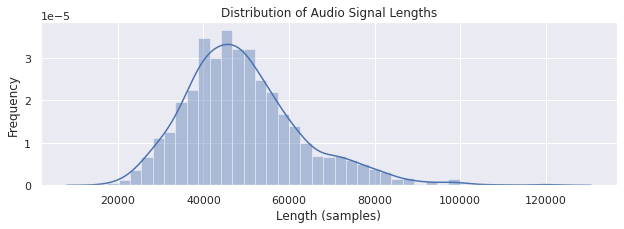

In [ ]:
#changing plotting style
sns.set() 

#Adjusting figure size
plt.rcParams["figure.figsize"] = (10.33, 3)

# Extract audio data from the training set
audio_data = [timit['test'][i]['audio']['array'] for i in range(timit['test'].num_rows)]

# Plot the distribution of audio signal lengths
lengths = [len(audio) for audio in audio_data]
sns.distplot(lengths)
plt.title("Distribution of Audio Signal Lengths")
plt.xlabel("Length (samples)")
plt.ylabel("Frequency")
plt.show()

# Observation from "Distribution of Audio Signal Lengths"
The above plot shows that the "TIMIT" dataset has mostly 48436 samples per audio clip while the occurrence of fewer than 25000 samples and greater than 80000 samples per audio clip in this dataset is quite relatively low.

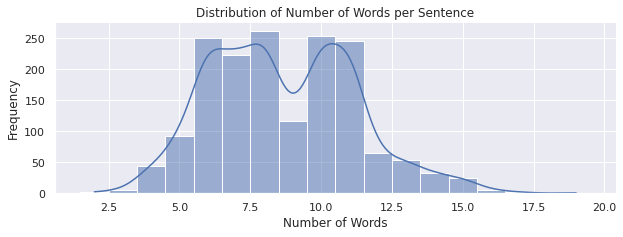

In [ ]:
# Plot the distribution of the number of words per sentence
num_words = [len(timit['test'][i]['word_detail']['utterance']) for i in range(timit['test'].num_rows)]
sns.displot(num_words, discrete=True, height=3, aspect=2.94, kde=True)
plt.title("Distribution of Number of Words per Sentence")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Observation from "Distribution of Number of Words per Sentence"
The above plot shows that:

1.   This dataset has mostly 8 words per sentence
2.   While the occurrence of fewer than 5 words and greater than 15 or more words per sentence in this dataset is quite relatively low.

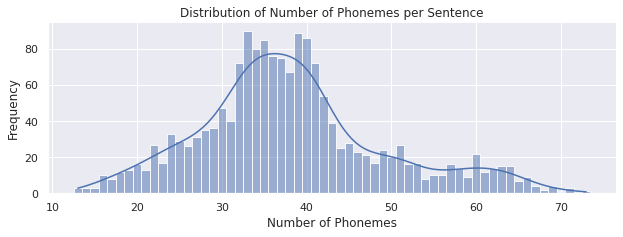

In [ ]:
num_phonemes = [len(timit['test'][i]['phonetic_detail']['utterance']) for i in range(timit['test'].num_rows)]
sns.displot(num_phonemes, bins= 80, discrete=True, height=3, aspect=2.94, kde=True)
plt.title("Distribution of Number of Phonemes per Sentence")
plt.xlabel("Number of Phonemes")
plt.ylabel("Frequency")
plt.show()

#Observations from "Distribution of Number of Phonemes per Sentence"
The above plot shows that:

1.   This dataset has mostly 33 phonemes per sentence
2.   While the occurrence of fewer than 20 phonemes and greater than 60 phonemes per sentence in this dataset is quite relatively low.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


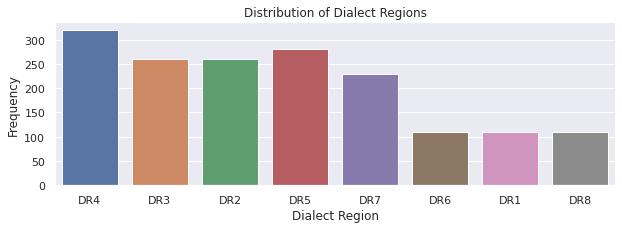

In [ ]:
#Adjusting figure size
plt.rcParams["figure.figsize"] = (10.05, 3)

# Plot the distribution of dialect regions
dialect_regions = [timit['test'][i]['dialect_region'] for i in range(timit['test'].num_rows)]
sns.countplot(dialect_regions)
plt.title("Distribution of Dialect Regions")
plt.xlabel("Dialect Region")
plt.ylabel("Frequency")
plt.show()

#Observations from "Distribution of Dialect Regions"
The above plot shows that:

1.   This dataset has mostly 'DR4' dialect region recordings.
2.   While the 'DR6','DR1' and 'DR8' dialect region recordings in this dataset are quite relatively low.

In [ ]:
xx = list(set(lengths))
temp = []
for i in range(len(xx)):
  temp.append(lengths.count(xx[i]))
temp1 = max(temp)
for i in range(len(lengths)):
  if lengths.count(lengths[i]) == temp1:
    temp3 = lengths.index(lengths[i])
    print(lengths[temp3])
    break

48436
